In [1]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [5]:
data1=[5,15,20,25,30,35,85,195]
outlier=[]

Calculate the quartile :Q1, Q2, Q3

In [6]:
Q1=np.percentile(data1,25,interpolation='midpoint')
Q2=np.percentile(data1,50,interpolation='midpoint')
Q3=np.percentile(data1,75,interpolation='midpoint')

In [7]:
print(Q1,Q2,Q3)

17.5 27.5 60.0


Calculate the IQR

In [23]:
IQR=1.3*(Q3-Q1)

In [24]:
IQR

55.25

Calculate lower and higher points

In [10]:
lower= Q1-IQR

higher= Q3+ IQR

In [11]:
print(lower, higher)

-37.75 115.25


findout the outliers

In [16]:
for i in data1:
    if i<lower or i>higher:
        print(i)
        outlier.append(i)

195


In [17]:
print(outlier)

[195]


# SCIPY method to calculate IQR

In [18]:
from scipy import stats 

In [25]:
data1=[5,15,20,25,30,35,85,195]
  
# Interquartile range (IQR) 
IQR = stats.iqr(data1, interpolation = 'midpoint') 
  
print(IQR) 

42.5


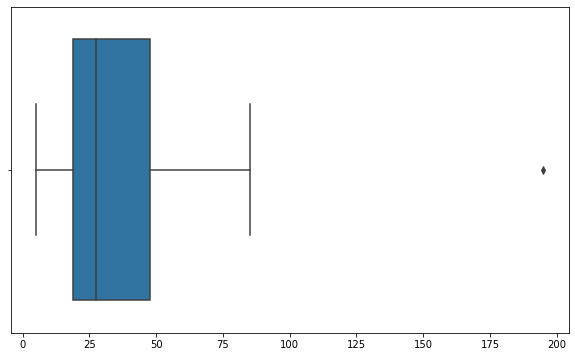

In [35]:
sns.boxplot(data1)

(array([3., 3., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([  5.,  24.,  43.,  62.,  81., 100., 119., 138., 157., 176., 195.]),
 <a list of 10 Patch objects>)

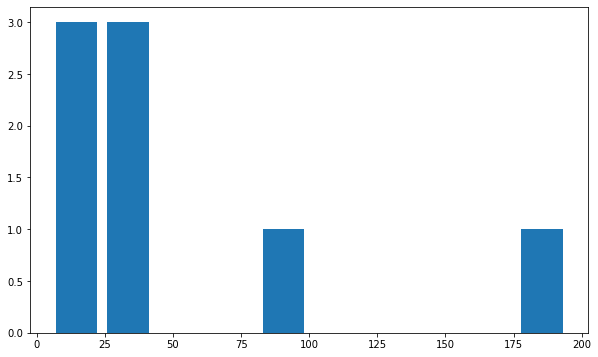

In [37]:
plt.hist(data1,rwidth=0.8)

In [38]:
import pandas as pd

In [75]:
df=pd.read_csv(r"D:\Python\data\bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [42]:
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12651,Haralur Road,3 BHK,1255.0,3.0,90.00,3,7171
8748,Yeshwanthpur,3 BHK,2504.0,3.0,138.00,3,5511
10529,Electronic City,2 BHK,1140.0,2.0,33.84,2,2968
8090,other,3 BHK,1650.0,3.0,110.00,3,6666
821,other,2 BHK,460.0,1.0,15.00,2,3260


In [76]:
df['price_per_sqft'].mean()

7920.336742424242

In [77]:
Q1=np.percentile(df['price_per_sqft'],25,interpolation='midpoint')

Q3=np.percentile(df['price_per_sqft'],75,interpolation='midpoint')

In [52]:
print(Q1,Q3)

4267.0 7317.0


In [78]:
IQR= 1.3*(Q3-Q1)

In [79]:
print(IQR)

3965.0


In [80]:
lower= Q1-IQR
higher=Q3+IQR

print(lower,higher)

302.0 11282.0


In [65]:
outlier=[]
for i in df['price_per_sqft']:
    if i<lower or i> higher:
        outlier.append(i)
        

In [83]:

df2=df[(df.price_per_sqft>higher) | (df.price_per_sqft<lower)]

df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [90]:
df.shape

(13200, 7)

In [91]:
df2.shape

(1398, 7)

In [92]:
13200-1398

11802

In [93]:
df3 = df[(df.price_per_sqft<higher) & (df.price_per_sqft>lower)]

In [94]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407
